# 1- Problem:

Stroke is the second-leading cause of death and the most common global cause of disability. WHO estimates that 1 in 4 persons may experience a stroke during their lifetime; because strokes can occur at any time and to anyone, regardless of age, we have chosen to concentrate on this dataset. Given the sudden nature of strokes, we intend to investigate and analyze the data to provide predictions on what are some risk factors and shed light on the types of people who are likely to experience one, allowing for future changes in lives. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age,bmi, various diseases such as hypertension and heart disease, smoking status,marital  status and residence type. Each row in the data provides relavant information about the patient.


# 2- Data mining task:


Data mining plays a crucial role in predicting the probability of having a stroke through classification and clustering techniques. By applying data mining algorithms to a large dataset containing various health-related features, valuable patterns and relationships can be discovered. In the classification aspect, data mining aids in building models that can accurately classify individuals into different categories, such as 1 for "stroke" or 0 for "non-stroke," based on their attributes and risk factors. This helps in identifying individuals who are more likely to experience a stroke, enabling proactive interventions and preventive measures. On the other hand, clustering techniques assist in identifying groups or clusters of individuals with similar characteristics, allowing for a deeper understanding of stroke risk factors and potential subgroups within the population. By leveraging data mining in stroke prediction, healthcare professionals and researchers can gain valuable insights and develop effective strategies for stroke prevention, early detection, and personalized treatments.

# 3- Dataset information:

Our dataset source is : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [77]:
data<-read.csv("./Dataset/healthcare-dataset-stroke-data.csv")

In [78]:
head(data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


## Genral info about the dataset:
Among the 5110 objects in our dataset sample, 12 attributes are used to describe them.
Our characteristics' values are utilized to identify their types, such as the nominal for id, binary for gender, and numeric for age.  
Additionally, we had two attributes for hypertension and heart disease that took two values 1 and 0 to indicate whether they are sufferd from it or not, respectively. The last attribute, **"stroke"**, was described by two values 0 and 1 for the possibility of having a stroke or not as a result of analysis of the previous data, , which is what we aim to train our model to predict.


## Data dictionary:

<table>
<tr>
    <th>Attribute Name</th>
	<th>Description</th>
	<th>Data Type</th> 
	<th>Possible values</th> 
</tr>

<tr>
    <td>id</td> 
    <td>Unique id of the patient</td>
	<td>Nominal</td>
	<td>Range between 67-72940</td>
	
</tr>

<tr>
    <td>gender</td> 
    <td>Gender of the patient</td>
	<td>Binary</td>	
    <td>Female <br> Male</td>   
</tr>

<tr>
    <td>age</td>
    <td>Age of the patient</td>
	<td>Numeric</td>	
    <td>Range between 0.08-82</td>   
</tr>

<tr>
	<td>hypertension</td>
    <td>Hypertension binary feature, 1 means the patient has hypertension, 0 means they do not.</td> 
	<td>Binary</td>
    <td>0,1</td>   
</tr>

<tr>
	<td>heart_disease</td>
    <td>Heart disease binary feature, 1 means the patient has heart disease, 0 means they do not.</td> 
	<td>Binary</td>
    <td>0,1</td>   
</tr>

<tr>
	<td>ever_married</td> 
    <td>Has the patient ever been married?</td> 
	<td>Binary</td>
    <td>Yes <br> No</td>   
</tr>

<tr>
    <td>work_type</td> 
    <td>Work type of the patient</td> 
	<td>Nominal</td>
    <td>"Private" <br> "Self-employed" <br>"children" <br>"Govt_job" <br>"Never_worked"</td>
    
    
    
    
    
</tr>

<tr>
    <td>residence_type</td>
    <td>Residence type of the patient</td> 
	<td>Binary</td>
    <td>"Urban" <br> "Rural"</td>   
</tr>

<tr>
	<td>avg_glucose_level</td>
    <td>Average glucose level in blood</td> 
	<td>Numeric</td>
    <td>Range between 55.1-272</td>   
</tr>

<tr>
	<td>bmi</td>
    <td>Body Mass Index</td> 
	<td>Numeric</td>
    <td> Range between 10.3-97.6 </td>   

</tr>

<tr>
	<td>smoking_status</td>
    <td>Smoking status of the patient</td> 
    <td>Nominal</td>  
	<td>"never smoked" <br> "Unknown" <br> "formerly smoked" <br> "smokes"</td>
	
</tr>

<tr>
	<td>stroke</td>
    <td>Stroke event, 1 means the patient had a stroke, 0 means not</td> 
    <td>Binary</td>  
	<td>0,1</td>
	
</tr>

</table>

In [79]:
str(data)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : Factor w/ 419 levels "10.3","11.3",..: 240 419 199 218 114 164 148 102 419 116 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [80]:
#Number of rows
nrow(data)
#Number of column
ncol(data)

[1] 5110

[1] 12

In [81]:
# import necessary libraries
library(tidyverse)
library(ggplot2)
library(lubridate)
library(magrittr)
library(dplyr)
library(tidyr)
library(readr)
library(outliers)
library(caret)
library(DMwR)


#library(tidyverse)
#library(lubridate)
#-library(skimr)
#-library(janitor)
#library(dplyr)
#library(tidyr)
#library(readr)
#library(ggplot2)
#-library(gridExtra)

ERROR: Error in library(DMwR): there is no package called 'DMwR'


In [82]:
library(Hmisc)
describe(data)

ERROR: Error in library(Hmisc): there is no package called 'Hmisc'


In [83]:
#Five number summary:
summary(data)

       id           gender          age         hypertension    
 Min.   :   67   Female:2994   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932   Other :   1   Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

In [84]:
library(dplyr)
data %>% summarise_if(is.numeric, var)

id,age,hypertension,heart_disease,avg_glucose_level,stroke
447818462,511.3318,0.08797552,0.05110447,2050.601,0.04636264


In [85]:
cor(data$age,data$avg_glucose_level)

[1] 0.2381711

## Understanding the data through graph representations:

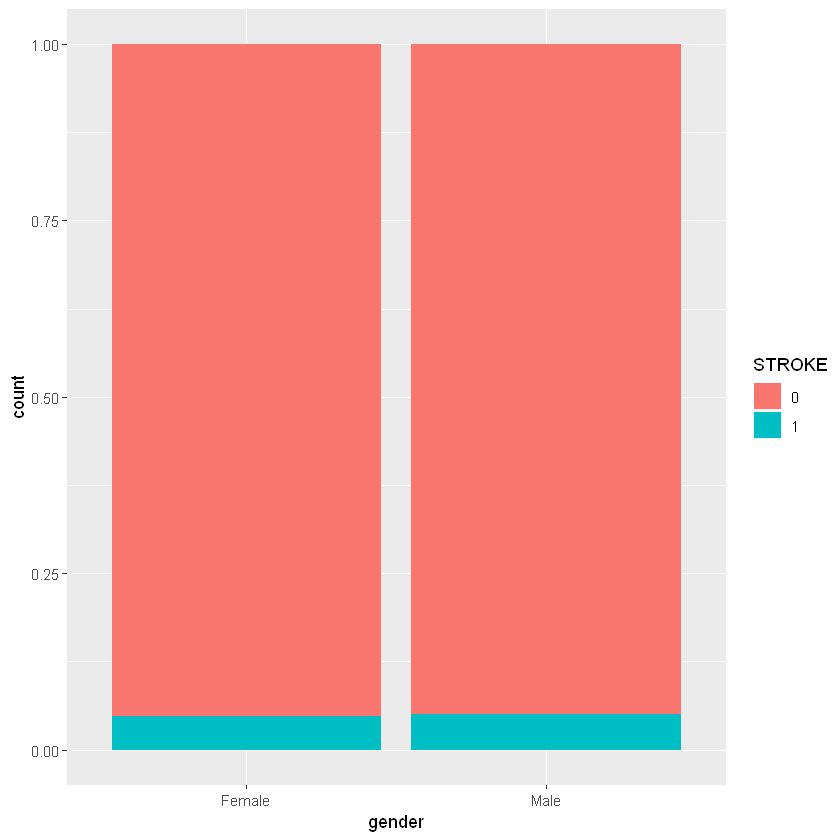

In [86]:
# check gender
data <- data %>% filter(gender != "Other")
ggplot(data, aes(x = gender, fill = as.factor(stroke))) +
  geom_bar(position = "fill") +
  labs(fill = "STROKE")

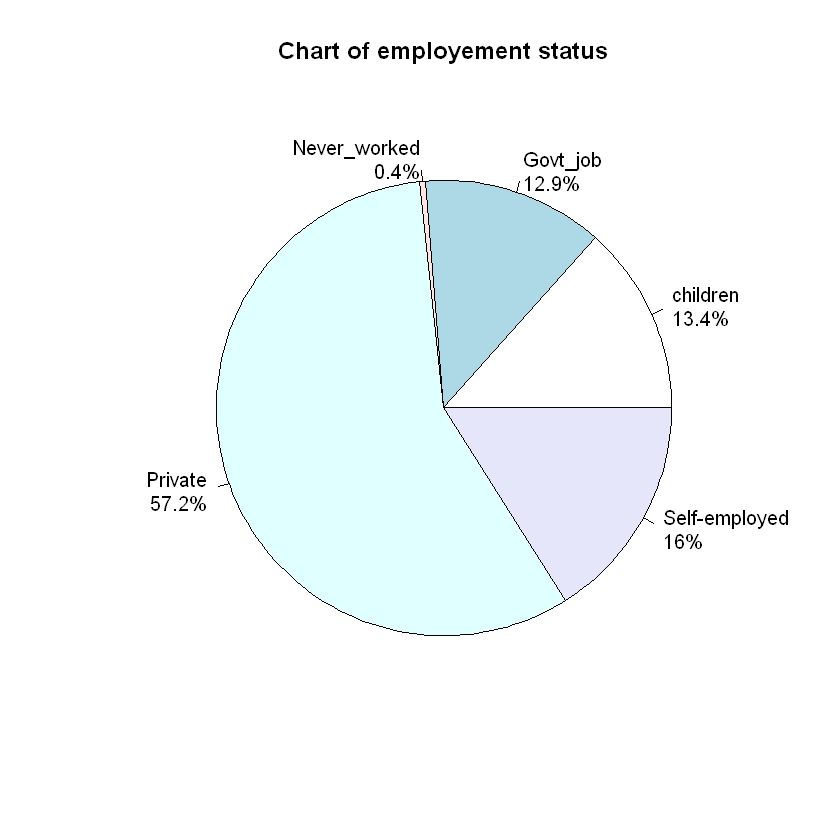

In [87]:
tab <- data$work_type %>% table()
precentages <- tab %>% prop.table() %>% round(3) * 100 
txt <- paste0(names(tab), '\n', precentages, '%') # text on chart
pie(tab, labels=txt ,main= "Chart of employement status") # plot pie chart

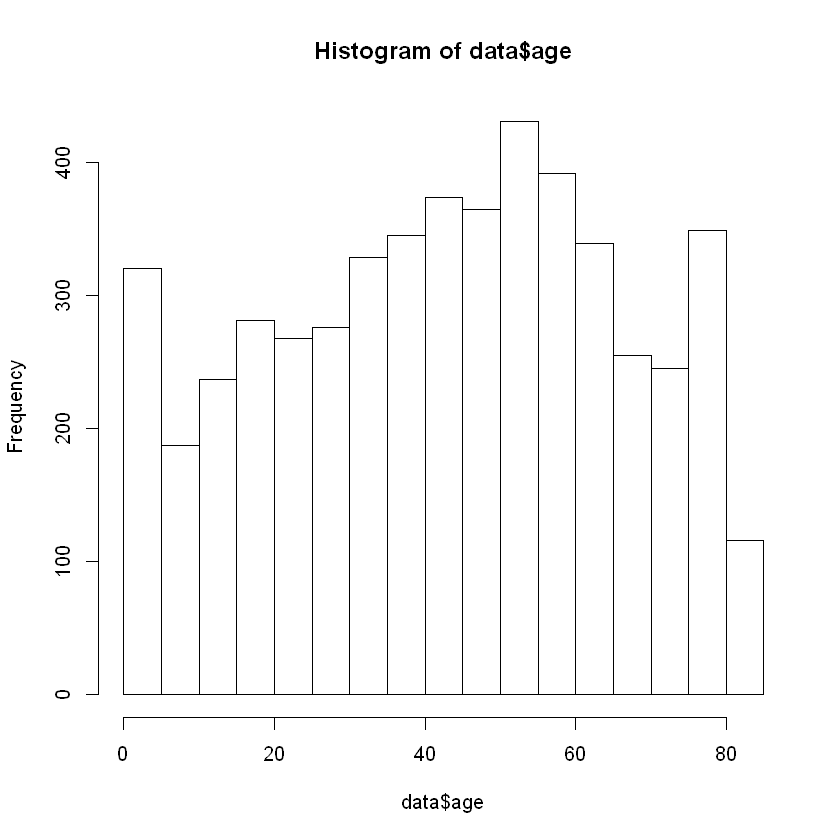

In [88]:
hist(data$age)

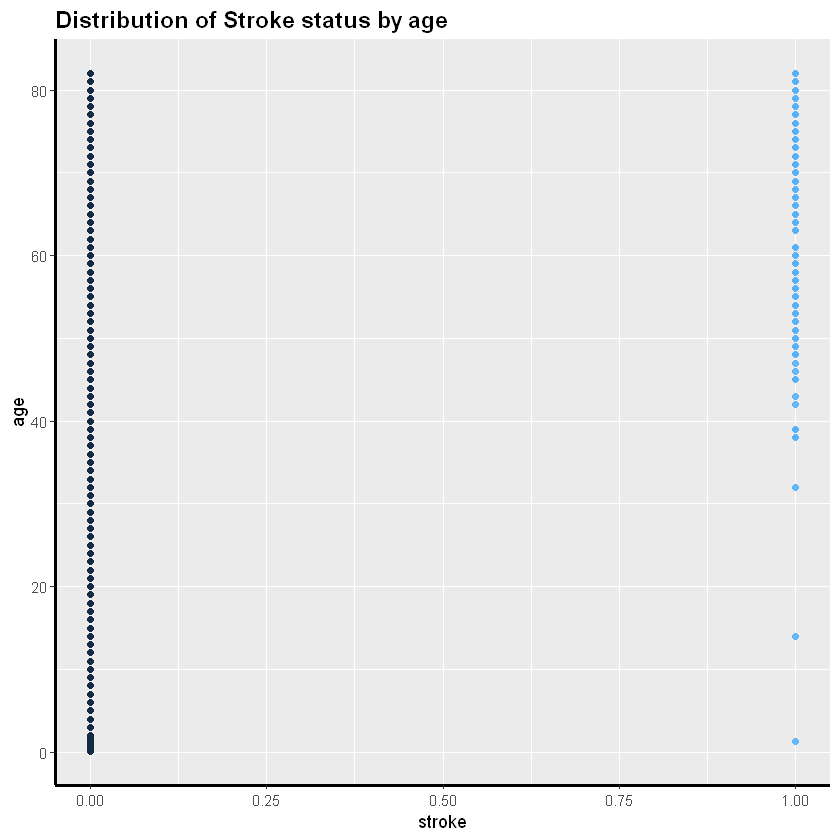

In [89]:
ggplot(data) + geom_point(mapping = aes(y = age, x = stroke, color = stroke ), alpha =0.9 )+ 
  labs(title = "Distribution of Stroke status by age" ) +
  theme( plot.title = element_text(size = 14, face = "bold"), legend.position = "none", axis.line = element_line(size = 1), axis.ticks = element_line() )

In [90]:
a <- data %>% filter(heart_disease == 0 ) %>% group_by(stroke) %>% summarise(people = n()) %>% 
  mutate( total = sum(people), percentage = (people/total)) %>% 
  ggplot(mapping = aes(x="", y = percentage, fill = stroke)) +
  geom_col( width = 1) + coord_polar(theta = "y", start = 0, direction = 1) +
  theme(  axis.ticks = element_blank(), panel.grid = element_blank(), axis.title = element_blank(), axis.text = element_blank(),plot.title = element_text(size = 14, face = "bold")) +
  geom_text(aes(label = scales::percent(percentage)), color = "White", position = position_stack(vjust = 0.8)) + labs(title = "Healthy heart Patients by stroke status")+ scale_fill_manual(values = c("burlywood3", "slateblue3"))

# percentage of people with hearth disease who has had stroke and people who has not

b <- data %>% filter(heart_disease == 1 ) %>% group_by(stroke) %>% summarise(people = n()) %>% 
  mutate( total = sum(people), percentage = (people/total)) %>% 
  ggplot(mapping = aes(x="", y = percentage, fill = stroke)) +
  geom_col( width = 1) + coord_polar(theta = "y", start = 0) + 
  theme(  axis.ticks = element_blank(), panel.grid = element_blank(), axis.text = element_blank(), axis.title = element_blank(),plot.title = element_text(size = 14, face = "bold")) + 
  geom_text(aes(label = scales::percent(percentage)), color = "White" , position = position_stack(vjust = 0.6))+ labs(title = "Heart disease Patients by stroke status") + scale_fill_manual(values = c("burlywood3", "slateblue3"))

# Viewing the two above charts together
grid.arrange(a,b, ncol = 1)

ERROR: Error in grid.arrange(a, b, ncol = 1): could not find function "grid.arrange"


# 4- Data Preprocessing:

In [97]:
# Change "N/A" to actual NULL
data$bmi[data$bmi=="N/A"] <-NA

In [98]:
#Checking missing values
sum(is.na(data))

[1] 201

In [99]:
#Checking duplicated rows
sum(duplicated(data))

[1] 0

In [100]:
#Converting bmi to numeric
data$bmi <- as.numeric(data$bmi)

In [101]:
##checking bmi type
class(data$bmi)

[1] "numeric"

In [102]:
#Replacing null values with the mean
data$bmi[is.na(data$bmi)]<-mean(data$bmi, na.rm = TRUE)

In [114]:
#Missing values
sum(is.na(data))

[1] 0

# detect and remove outliers:
we checked if there are any outliers' values in our dataset, and we find few outliers.
therefore, we must delete them before we start our work in order to prevent it from affecting our results.

In [115]:
#install outliers package
library(outliers)

#detect Age outliers
OutAge <- outlier(data$age)
print(OutAge)

[1] 0.08


In [116]:
#Remove age outlier
data= data[-OutAge,]

In [117]:
#detect Avrage glucose level outliers
OutAvg <- outlier(data$avg_glucose_level)
print(OutAvg)

[1] 271.74


In [118]:
#Remove Avrage glucose level outlier
data= data[-OutAvg,]

In [119]:
#detect bmi outliers
OutBMI <- outlier(data$bmi)
print(OutBMI)

[1] 418


In [120]:
#Remove bmi outlier
data= data[-OutBMI,]

In [121]:
#check after deleting
#Number of rows
nrow(data)
#Number of column
ncol(data)

[1] 5100

[1] 12

In [111]:
# outliers row is removed now
print(data)

        id gender   age hypertension heart_disease ever_married     work_type
3    31112   Male 80.00            0             1          Yes       Private
4    60182 Female 49.00            0             0          Yes       Private
5     1665 Female 79.00            1             0          Yes Self-employed
6    56669   Male 81.00            0             0          Yes       Private
7    53882   Male 74.00            1             1          Yes       Private
8    10434 Female 69.00            0             0           No       Private
9    27419 Female 59.00            0             0          Yes       Private
10   60491 Female 78.00            0             0          Yes       Private
11   12109 Female 81.00            1             0          Yes       Private
12   12095 Female 61.00            0             1          Yes      Govt_job
13   12175 Female 54.00            0             0          Yes       Private
14    8213   Male 78.00            0             1          Yes 

In [102]:
#only one column with Gender "Other" 
data[data$gender=="Other", ]

# delete it 
data = data[data$gender!="Other", ]

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [103]:
##check
table(data$gender)


Female   Male  Other 
  2994   2115      0 

In [104]:
## convert stroke to factor(to use scaling)
data$stroke <- as.factor(data$stroke)

[1] 2

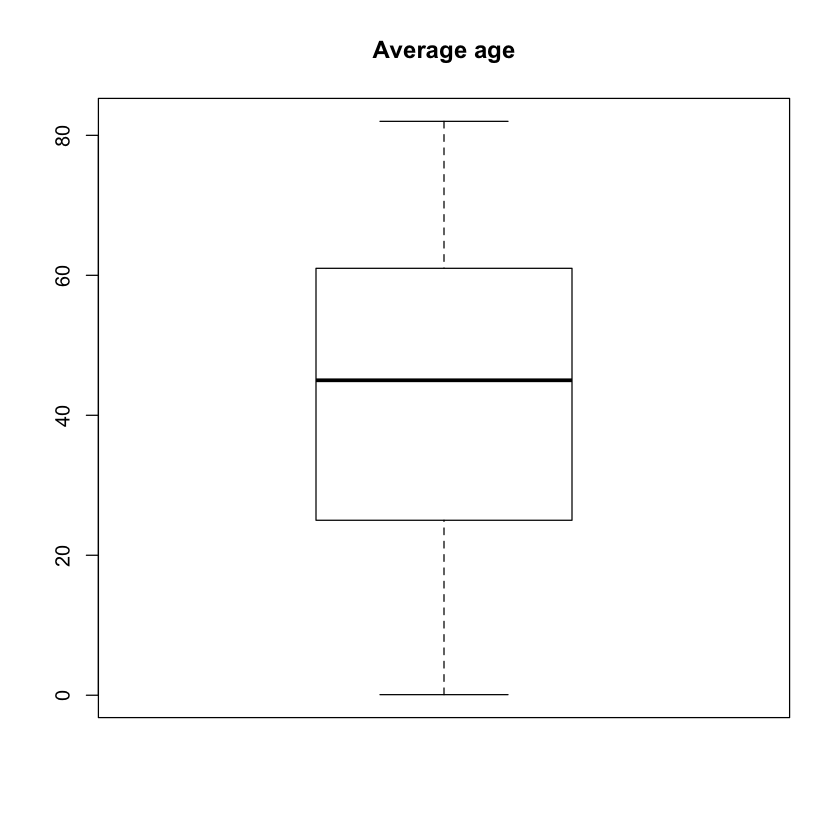

In [105]:
OutAge = outlier(data$age, logical =TRUE)
sum(OutAge)
boxplot(data$age,main="Average age")

[1] 1

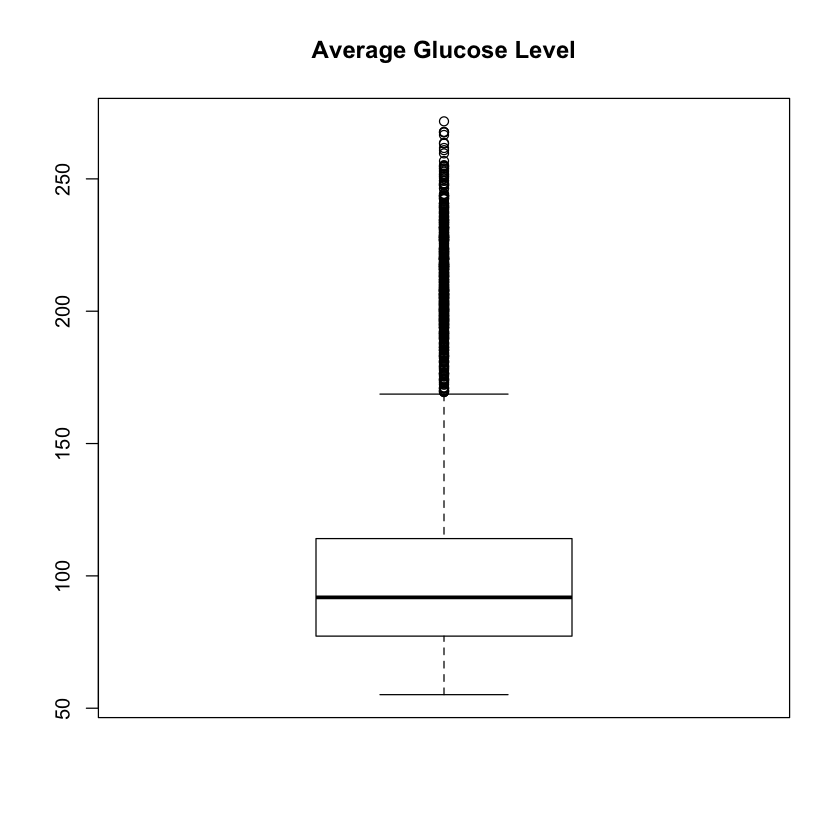

In [106]:
OutAvgGlucLevel = outlier(data$avg_glucose_level, logical =TRUE)
sum(OutAvgGlucLevel)
boxplot(data$avg_glucose_level,main="Average Glucose Level")

[1] 1

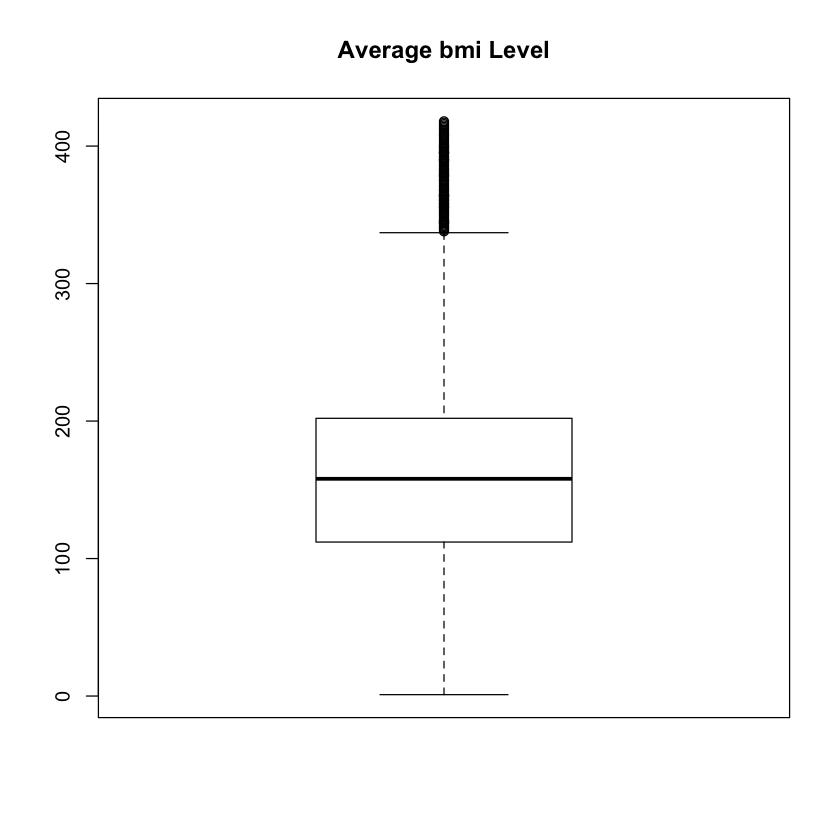

In [107]:
OutBMI = outlier(data$bmi, logical =TRUE)
sum(OutBMI)
boxplot(data$bmi,main="Average bmi Level")

## Encoding categorical data:

In [108]:
head(data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,240.0000,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,162.1021,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,199.0000,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,218.0000,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,114.0000,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,164.0000,formerly smoked,1


In [109]:
data$work_type = factor(data$work_type,levels = c("Govt_job","Private", "Self-employed"
,"children","Never_worked"), labels = c(5,4,3,2,1))

In [110]:
data$gender = factor(data$gender, levels = c("Male", "Female"), labels = c(1, 2))

In [111]:
data$ever_married= factor(data$ever_married, levels = c("No", "Yes"), labels = c(0, 1))

In [112]:
data$Residence_type= factor(data$Residence_type, levels = c("Urban", "Rural"), labels = c(1, 2))

In [113]:
data$smoking_status= factor(data$smoking_status, levels = c("Unknown","never smoked", "formerly smoked","smokes"), labels = c(1,2,3,4))

In [114]:
head(data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,1,67,0,1,1,4,1,228.69,240.0000,3,1
51676,2,61,0,0,1,3,2,202.21,162.1021,2,1
31112,1,80,0,1,1,4,2,105.92,199.0000,2,1
60182,2,49,0,0,1,4,1,171.23,218.0000,4,1
1665,2,79,1,0,1,3,2,174.12,114.0000,2,1
56669,1,81,0,0,1,4,1,186.21,164.0000,3,1


 ## Normalize Data using Min-Max Scaling:
 

In [115]:
normalize <- function(x)
{
 return ((x - min(x))/ (max(x)- min(x)))   
}

data$avg_glucose_level= normalize(data$avg_glucose_level)
data$age= normalize(data$age)
data$bmi= normalize(data$age)
head(data)


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,1,0.8168945,0,1,1,4,1,0.8012649,0.8168945,3,1
51676,2,0.7436523,0,0,1,3,2,0.6790232,0.7436523,2,1
31112,1,0.9755859,0,1,1,4,2,0.2345120,0.9755859,2,1
60182,2,0.5971680,0,0,1,4,1,0.5360078,0.5971680,4,1
1665,2,0.9633789,1,0,1,3,2,0.5493491,0.9633789,2,1
56669,1,0.9877930,0,0,1,4,1,0.6051611,0.9877930,3,1


## discretization

After the process of normalizing and cleaning the data, it is found that there is no requirement for feature discretization.

## feature selection

Since all the columns are significant and will contribute to training the model, we have decided not to remove them, except for the identity column as it is not useful for prediction purposes.

In [116]:
#delete id coloumn
data <- data[, -1]

# imbalanced dataset problem:


In the given dataset, it is observed that only around 5% of all the individuals have experienced a stroke at some point. Consequently, our baseline dummy model achieves an accuracy of 95% by consistently predicting that individuals do not have a stroke. When evaluating our model, an essential metric to consider is sensitivity, also known as recall or the probability of detection. Low sensitivity indicates that our model struggles to identify true positive cases, even if the overall accuracy is high. In this case, the dummy model has a sensitivity of 0 since it fails to identify any true positives.

Addressing the class imbalance issue, there are various approaches available. Considering the limited size of the dataset, oversampling the minority class is deemed the most suitable strategy. By oversampling, we increase the representation of the minority class instances, enabling the model to learn and generalize better for this class.


  0   1 
0.5 0.5 


   0    1 
4860 4860 

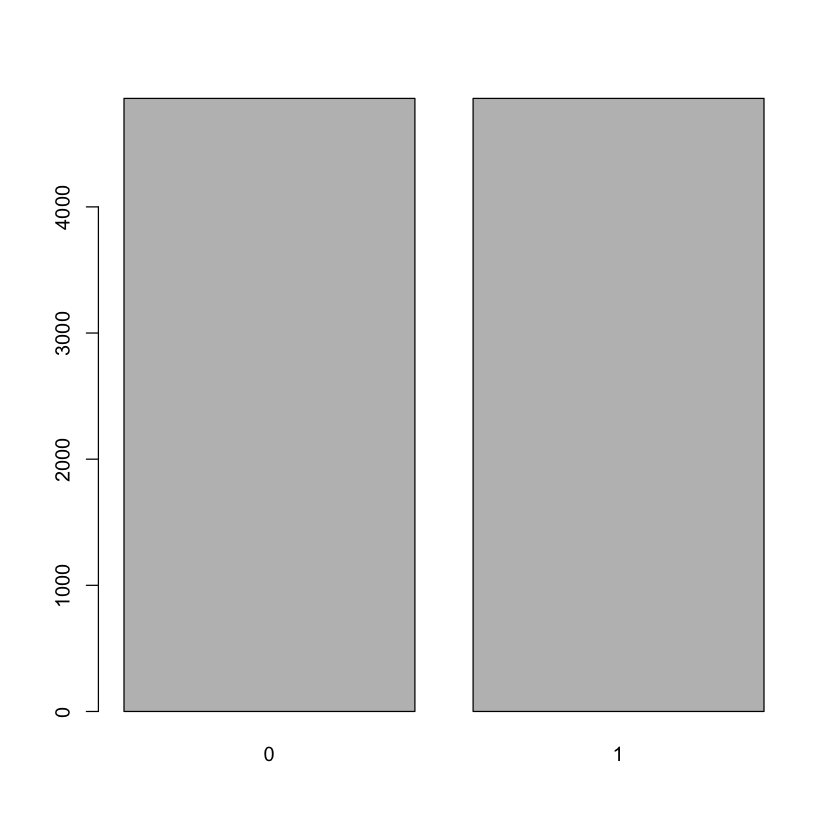

In [117]:
##upscaling the data
data<-upSample(data[,-11],data$stroke, yname="stroke")
plot(data$stroke)

## checking the number of stroke/ non-stroke observations
prop.table(table(data$stroke))
table(data$stroke)